In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
df_test= pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")
df_train.info()    
df_test.info()
print("#1. 兩者相差一半的數量")

print(df_test.isnull().head(5))


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_train.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [10]:
print(df_test.isnull().head(5))
print(df_test.isnull().any().sum())
'''
#2.  測試資料集有遺失值
'''

   PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0        False   False  False  False  False  False  False   False  False   
1        False   False  False  False  False  False  False   False  False   
2        False   False  False  False  False  False  False   False  False   
3        False   False  False  False  False  False  False   False  False   
4        False   False  False  False  False  False  False   False  False   

   Cabin  Embarked  
0   True     False  
1   True     False  
2   True     False  
3   True     False  
4   True     False  
3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
cabin 遺失個數= 1014
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
C78                4
                  ..
D48                1
A16                1
A36                1
F E57              1
A23       

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,NoCabin,0.299854
8,T,0.000000


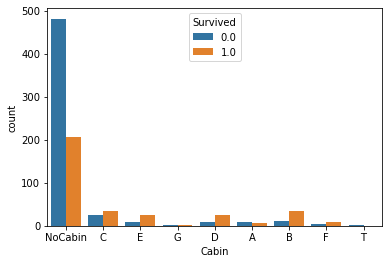

In [5]:
data = df_train.append(df_test)

print(data.info())

print('cabin 遺失個數=',data['Cabin'].isnull().sum())

print(data["Cabin"].value_counts())

data['Cabin'].head(10)
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()
sns.countplot(data['Cabin'], hue=data['Survived'])

data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)


